In [43]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from image_extractor import preprocess_hsv

ori =  179.98973083496094


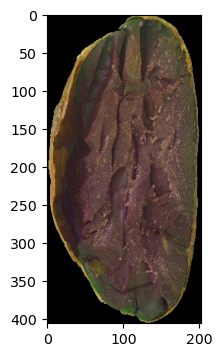

In [44]:
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (1).JPG'
# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Brittle/image (35).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (23).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (56).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Moldered/image (67).JPG'
plt.rcParams['figure.dpi'] = 102
image = cv2.imread(image_dir)
image_hsv , cnt= preprocess_hsv(image)
image_rgb = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image_rgb)

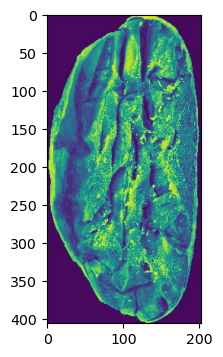

In [53]:
h,s,v = cv2.split(image_hsv)
clahe_op = cv2.createCLAHE(6, (8,8))
clahe_v = clahe_op.apply(v)

plt.imshow(clahe_v)

[ 0.  2.  4.  6.  8. 10.]


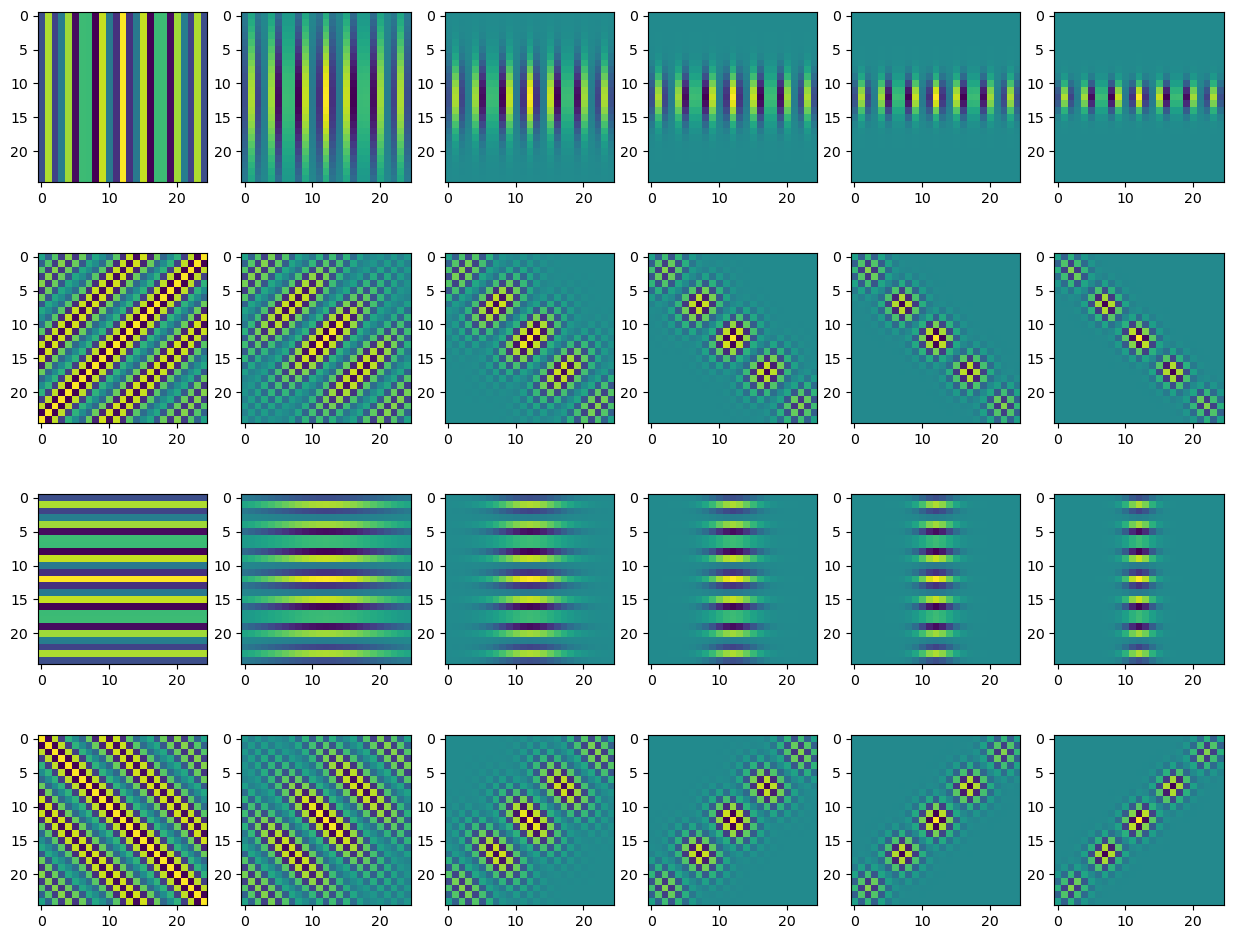

In [119]:
plt.rcParams["figure.figsize"] = (15,12)
pi = np.pi
theta = [0, pi/4, pi/2, 3*pi/4]
psi = np.linspace(0,10,6)
print(psi)
kernel = []
for i in range(len(theta)):
    for j in range(len(psi)):
        plt.subplot(len(theta), len(psi),i*len(psi)+j+1)
        kernel.append(cv2.getGaborKernel((25,25), sigma=15, theta=theta[i], lambd=np.pi/2, gamma=psi[j], psi=0))
        plt.imshow(kernel[len(kernel)-1])

In [120]:
print(len(kernel))

24


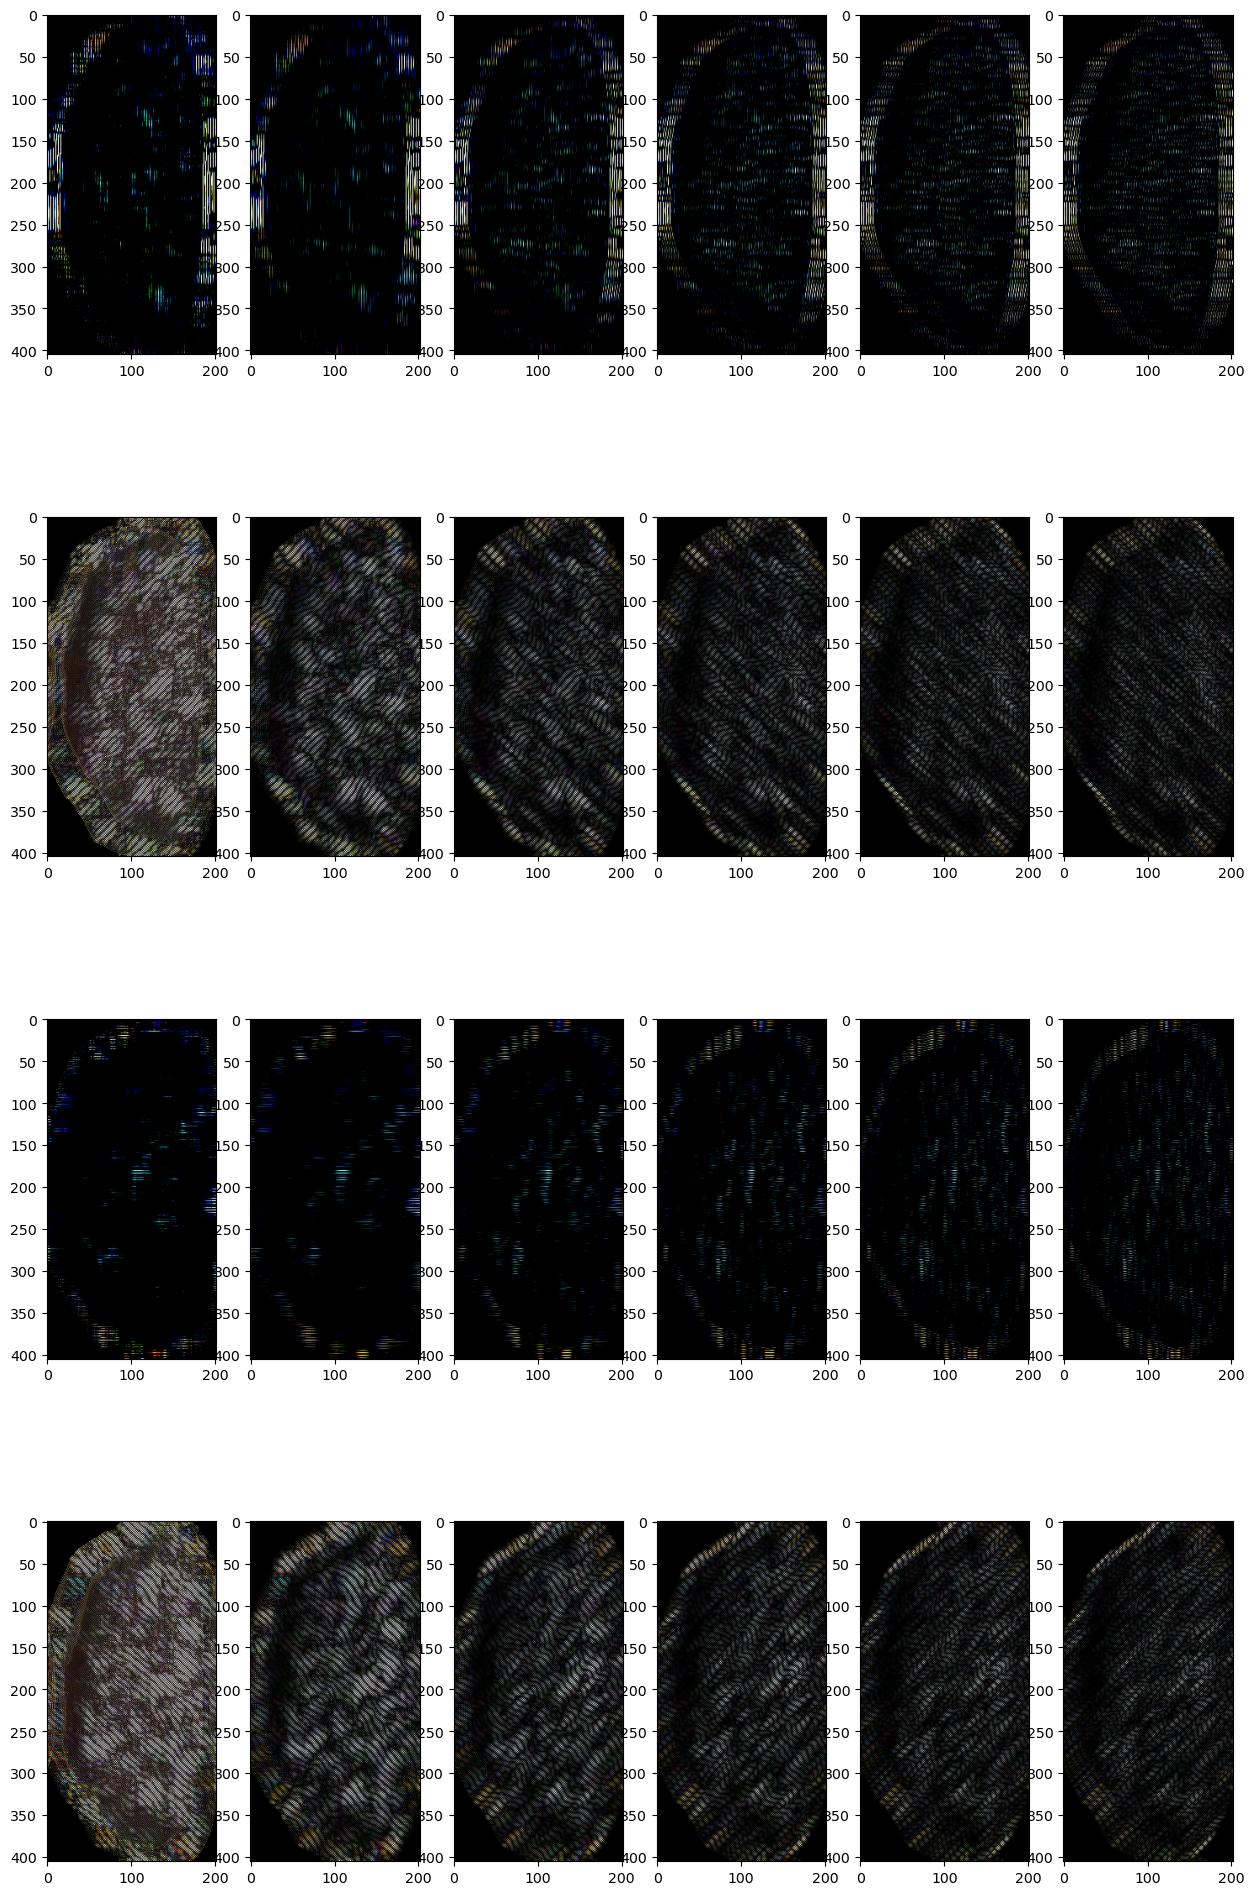

In [124]:
plt.rcParams["figure.figsize"] = (15,25)

gabor = []
for i in range(len(theta)):
    for j in range(len(psi)):
        # print(i,j)
        plt.subplot(len(theta), len(psi),i*len(psi)+j+1)
        im = cv2.filter2D(image_rgb, cv2.CV_8UC3, kernel[i*len(psi)+j])
        plt.imshow(im, cmap='gray')